### 1. Data Sources

An ML system can work with data from many different sources. They have different characteristics, can be used for different purposes, and require different processing methods.

1. **User input data**
    - User input data can be easily malformatted (users to input wrong data).
    - Users have little patience. When we input data, we expect to get results back immediately (require fast processing).
2. **System-generated data**
    -  Data generated by different components of your systems, which include various types of **logs** and **system outputs** such as model predictions.
    - The system also **generates data to record users’ behaviors**, such as clicking, choosing a suggestion, scrolling, zooming, ignoring a pop-up, or spending an unusual amount of time on certain pages. Even though this is system-generated data, it’s still considered **part of user data and might be subject to privacy regulations**.

Logs: 
- Can **record the state and significant events of the system**, such as memory usage, number of instances, services called, packages used, etc. 
- They can **record the results of different jobs**, including large batch jobs for data processing and model training. 
- These types of logs **provide visibility into how the system is doing**. The main purpose of this visibility is for debugging and potentially improving the application. Most of the time, you don’t have to look at these types of logs, but they are essential when something is on fire.
- Logs are much **less likely to be malformatted** the way user input data is. Overall, logs **don’t need to be processed as soon as they arrive**, the way you would want to process user input data. 
- For many use cases, it’s acceptable to process logs periodically, such as hourly or even daily. However, you might still want to process your logs fast to be able to detect and be notified whenever something interesting happens
- It's a common practice to **log everything you can**. This means that your **volume of logs can grow very quickly**.

Problems of logs:
- Hard to know where to look because signals are lost in the noise
    -  There have been **many services that process and analyze logs**, such as Logstash, Datadog, Logz.io, etc. Many of them use ML models to help you process and make sense of your massive number of logs.
- How to store a rapidly growing number of logs
    - In most cases, you only have to **store logs for as long as they are useful** and can **discard them when they are no longer relevant** for you to debug your current system.
    - If you don’t have to access your logs frequently, they can also be stored in **low-access storage** that costs much less than higher-frequency-access storage.

3. **Internal databases**
    - Generated by various services and enterprise applications in a company. 
    - These databases manage their assets such as inventory, customer relationship, users, and more.
    - This kind of data can be used by ML models directly or by various components of an ML system. 
    - e.g. When users enter a search query on Amazon, one or more ML models process that query to detect its intention—if someone types in “frozen,” are they looking for frozen foods or Disney’s Frozen franchise?—then Amazon needs to check its internal databases for the availability of these products before ranking them and showing them to users.

4. **Third-party data**
    - *First-party data*: the data that your company already collects about your users or customers.
    - *Second-party data*: data collected by another company on their own customers that they make available to you, though you’ll probably have to pay for it. 
    - *Third-party data* companies collect data on the public who aren’t their direct customers.

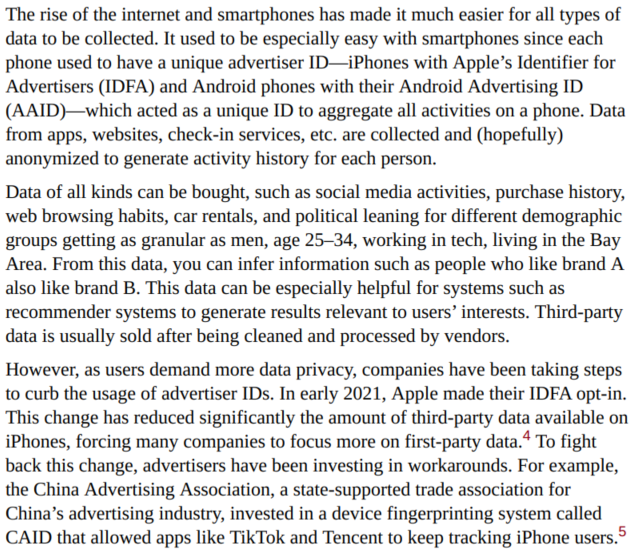

### 2. Data Formats

Once you have data, you might want to store it (or “persist” it, in technical terms).

**Data Serialization**: The process of converting a data structure or object state into a format that can be stored or transmitted and reconstructed later. 

Common data formats: 

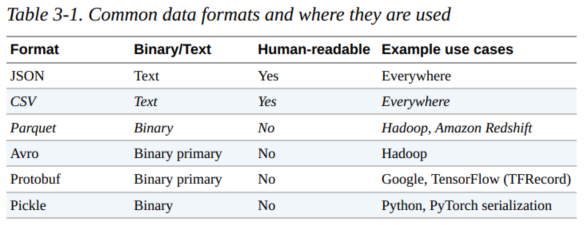

#### 2.1 JSON

- JavaScript Object Notation.
- It’s language-independent—most modern programming languages can generate and parse JSON.
- Its key-value pair paradigm is simple but powerful, capable of handling data of different levels of structuredness.
- Once you’ve committed the data in your JSON files to a schema, it’s pretty painful to retrospectively go back to change the schema.
- JSON files are text files, which means they take up a lot of space 

Structured format: 

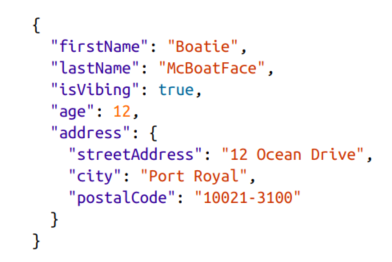

Unstructured format:

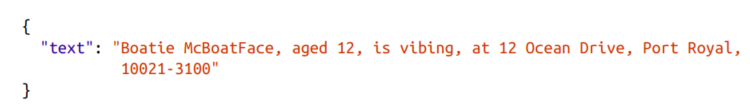

#### 2.2 Row-Major Versus Column-Major Format

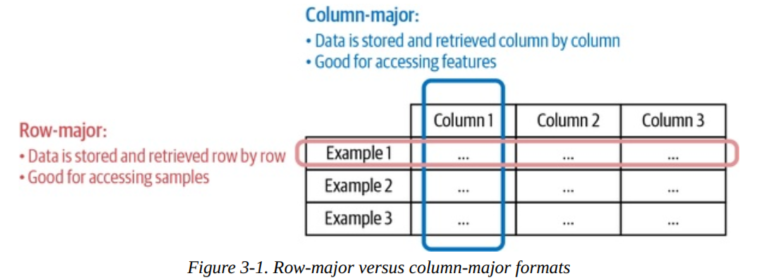

1. **Row-Major**: CSV (comma-separated values)
    - Which means consecutive elements in a row are stored next to each other in memory.
    - Because modern computers process sequential data more efficiently than nonsequential data, accessing data by rows is expected to be faster than accessing data by columns.
    - Better for accessing **examples**, e.g., accessing all the examples collected today. 
    -*Better when you have to do a **lot of data writes (faster)**.
2. **Column-Major**: Parquet
    - Which means consecutive elements in a column are stored next to each other.
    - Allow flexible column-based reads, especially if your data is large with thousands, if not millions, of features.
    - Better for accesing **features**, e.g., accessing the timestamps of all your examples.
    - Better when you have to do **a lot of column-based reads**.

NumPy vs pandas:
1. pandas
  - Built around DataFrame, a concept inspired by R’s Data Frame, which is column-major.
2. NumPy
  - The major order can be specified.
  - When an `ndarray` is created, it’s row-major by default if you don’t specify the order.

Accessing a DataFrame by row is so much slower than accessing the same DataFrame by column. If you convert this same DataFrame to a NumPy `ndarray`, accessing a row becomes much faster, as you can see in the right panel of the figure.

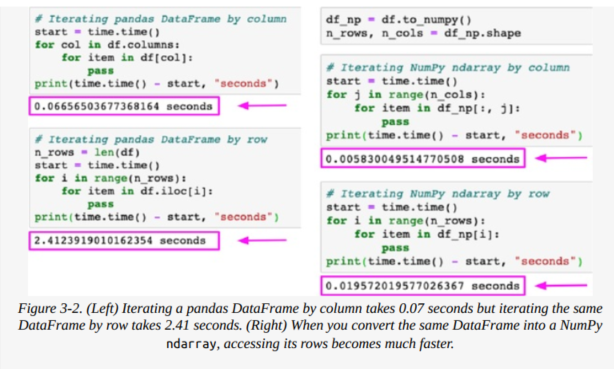

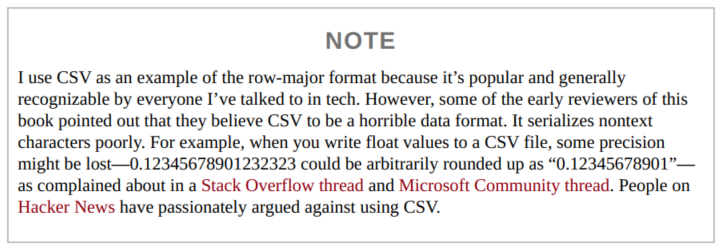

#### 2.3 Text Versus Binary Format

1. **Text**: CSV, JSON
    - Text files are files that are in plain text, which usually means they are human-readable.

2. **Binary**: Parquet
    -  Typically files that contain only 0s and 1s, and are meant to be read or used by programs that know how to interpret the raw bytes
    - Binary files are more compact

AWS recommends using the Parquet format because “the Parquet format is up to 2x faster to unload and consumes up to 6x less storage in Amazon S3, compared to text formats.”

CSV vs Parquet file size:

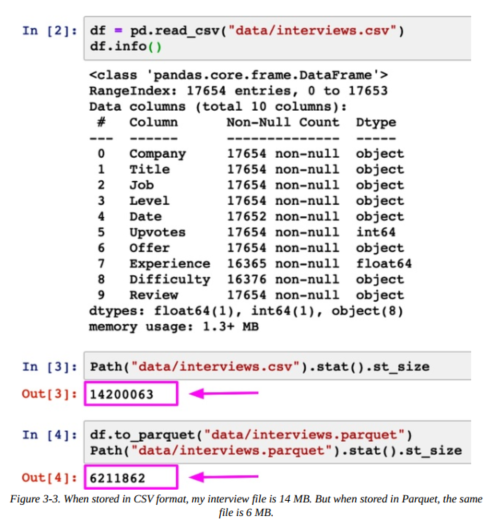

### 3. Data Models

##### 3.1 Relational Model

- Data is organized into **relations**; each relation is a set of **tuples**.
- A **table** is an accepted visual representation of a relation, and each **row** of a table makes up a tuple.
- **Relations are unordered**. You can shuffle the order of the rows or the order of the columns in a relation and it’s still the same relation. 
- Data following the relational model is usually stored in file formats like **CSV or Parquet**.
- It’s often desirable for relations to be **normalized**. Data normalization can follow normal forms such as the first normal form (1NF), second normal form (2NF), etc. 
- Normalization can reduce data redundancy and improve data integrity.

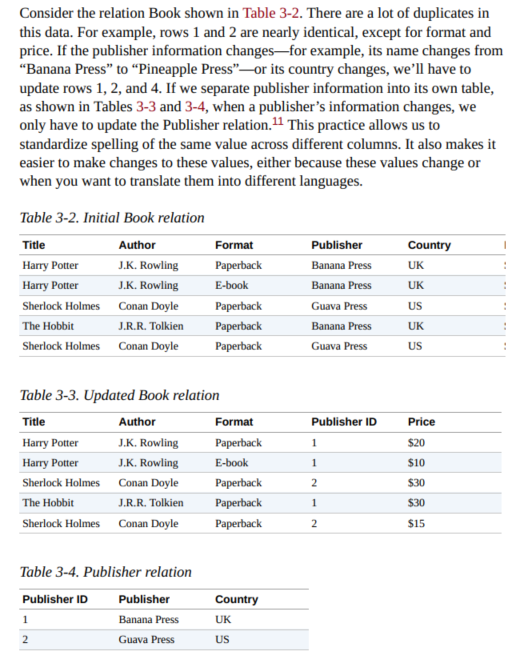

- One major downside of normalization is that your data is now spread across multiple relations. You can **join the data from different relations back together**, but joining can be expensive for large tables.
- Even though inspired by the relational model, the data model behind SQL has deviated from the original relational model. For example, **SQL tables can contain row duplicates**, whereas true relations can’t contain duplicates.
- SQL is a **declarative language**, as opposed to Python, which is an imperative language. 
- With certain added features, **SQL can be Turing-complete**, which means that, in theory, SQL can be used to solve any computation problem (without making any guarantee about the time or memory required). However, in practice, it’s not always easy to write a query to solve a specific task, and it’s not always feasible or tractable to execute a query.
- A **query optimizer** examines all possible ways to execute a query and finds the fastest way to do so. It’s possible to use ML to improve query optimizers based on learning from incoming queries.
- Query optimization is one of the most challenging problems in database systems, and normalization means that data is spread out on multiple relations, which makes joining it together even harder. 

From Declarative Data Systems to Declarative ML Systems

- With a declarative ML system, users only need to declare the features’ schema and the task, and the system will figure out the best model to perform that task with the given features.
- Users won’t have to write code to construct, train, and tune models.
- Popular frameworks for declarative ML are **Ludwig**, developed at Uber, and **H2O AutoML**.
- Ludwig: users can specity the model structure, such as the number of fully connected layers and the number of hidden units, on top of the features' schema and output.
- H2O AutoML: you don't need to specify the model structure or hyperparameters. It experiments with multiple model architectures and picks out the best model given the features and the task.

Here is an example to show how H2O AutoML works. You give the system
your data (inputs and outputs) and specify the number of models you want to
experiment. It’ll experiment with that number of models and show you the
best-performing model:

In [ ]:
# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# Show the best-performing models on the AutoML Leaderboard
lb = aml.leaderboard

- While declarative ML can be useful in many cases, it leaves unanswered the biggest challenges with ML in production. 
- With model being increasing commoditized, model development is often the easier part.
- The hard part lies in feature engineering, data processing, model evaluation, data shift detection, continual learning, and so on.

##### 3.2 NoSQL

- Two major types of nonrelational models are the **document** model and the **graph** model.
- Document model: targets use cases where data comes in self-contained documents and relationships between one document and another are rare.
- Graph model: targeting use cases where relationships between data items are common and important.

Document model

- A document is often a **single continuous string**, encoded as JSON, XML, or a binary format like BSON (Binary JSON).
- All documents in a document database are assumed to be **encoded in the same format**. 
- Each document has a **unique key** that represents that document, which can be used to retrieve it.
- A **collection of documents** could be considered analogous to a **table** in a relational database, and a **document** analogous to a **row**.
- All rows in a table must follow the same schema (e.g., have the same sequence of columns), while **documents in the same collection can have completely different schemas**.
- The document model has **better locality** than the relational model.
- **Harder and less efficient** to **execute joins across documents** compared to across tables.
- Because of the different strengths of the document and relational data models, it’s common to use both models for different tasks in the same database systems. More and more database systems, such as **PostgreSQL and MySQL**, support them both.

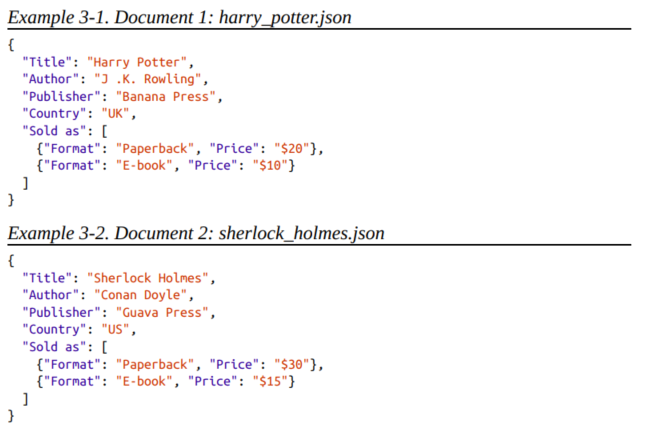

Graph model

- A graph consists of nodes and edges, where the **edges** represent the **relationships between the nodes**.
- If in document databases, the content of each document is the priority, then in graph databases, the **relationships between data items are the priority**.
- **Faster** to retrieve data based on relationships.
- Nodes can be of different data types.

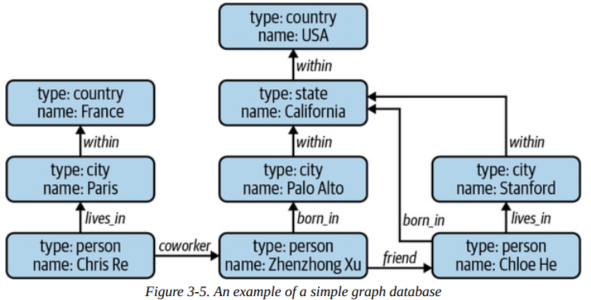

Imagine you want to find everyone who was born in the USA. Given this graph,
you can start from the node USA and traverse the graph following the edges
“within” and “born_in” to find all the nodes of the type “person.” Now, imagine
that instead of using the graph model to represent this data, we use the relational
model. There’d be no easy way to write an SQL query to find everyone who was
born in the USA, especially given that there are an unknown number of hops
between country and person—there are three hops between Zhenzhong Xu and
USA while there are only two hops between Chloe He and USA. Similarly,
there’d be no easy way for this type of query with a document database.

##### 3.3 Structured Versus Unstructured Data

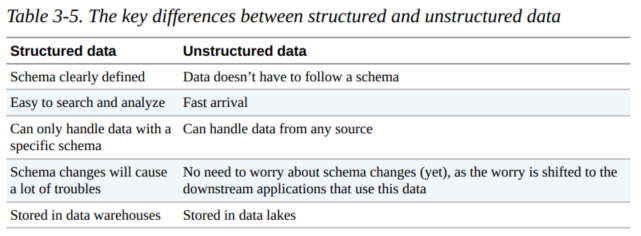

**Structured Data**:
- Follows a **predefined data model**, also known as a **data schema**.
- The disadvantage of structured data is that you have to commit your data to a predefined schema. If your schema changes, you’ll have to retrospectively update all your data, often causing mysterious bugs in the process.
- A repository for storing structured data is called a **data warehouse**. Data warehouses are used to store data that has been **processed into formats ready to be used**.

**Unstructured Data**:
- Doesn’t adhere to a predefined data schema. 
- It’s usually text but can also be numbers, dates, images, audio, etc.
- Even though unstructured data doesn’t adhere to a schema, it might still contain intrinsic patterns that help you extract structures.
- Allows for more **flexible storage options**. e.g. if your storage follows a schema, you can only store data following that schema. But if your storage doesn’t follow a schema, you can store any type of data. You can convert all your data, regardless of types and formats, into bytestrings and store them together.
- A repository for storing unstructured data is called a **data lake**. Data lakes are usually used to store **raw data before processing**.

### 4. Data Storage Engines and Processing

- Storage engines, also known as **databases**, are the implementation of **how data is stored and retrieved on machines**.
- Two types of **workloads** that databases are optimized for, **transactional processing and analytical processing**.

#### 4.1 Transactional and Analytical Processing

**Transactional Processing**:
-  In the digital world, a **transaction** refers to **any kind of action**: tweeting, ordering a ride through a ride-sharing service, uploading a new model, watching a YouTube video, and so on.
- The transactions are inserted as they are generated, and occasionally updated when something changes, or deleted when they are no longer needed. This type of processing is known as **online transaction processing (OLTP)**.
- These transactions often involve users, they need to be processed **fast (low latency)** so that they don’t keep users waiting.
- The processing method needs to have **high availability**—that is, the processing system needs to be available any time a user wants to make a transaction.
- If your **system can’t process a transaction, that transaction won’t go through**.
- **ACID** (Atomicity, Consistency, Isolation, Durability).
- Don’t necessarily need to be ACID, and some developers find ACID to be too restrictive. According to Martin Kleppmann, “systems that do not meet the ACID criteria are sometimes called **BASE**, which stands for **Basically Available, Soft state, and Eventual consistency**. 
- Because each transaction is often processed as a unit separately from other transactions, transactional databases are often **row-major**.

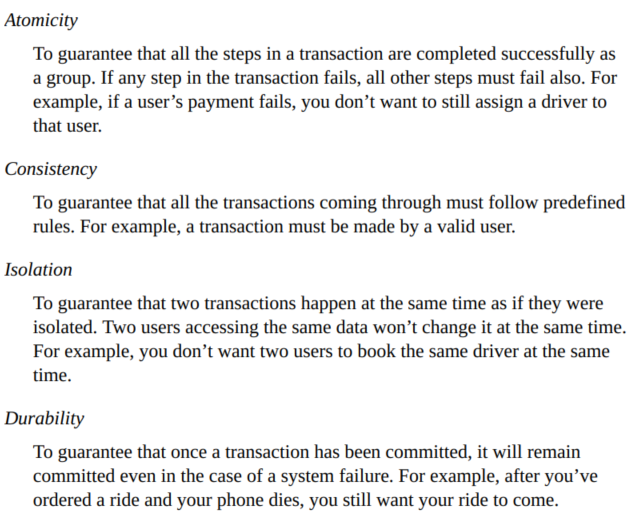

**Analytical Processing**:
- Transactional databases might not be efficient for questions such as “What’s the average price for all the rides in September in San Francisco?” This kind of **analytical question requires aggregating data in columns across multiple rows of data**. Analytical databases are designed for this purpose. 
- **Online analytical processing (OLAP)**

OLTP and OLAP have become outdated, why?
1. The separation of transactional and analytical databases was due to limitations of technology. It was hard to have databases that could handle both transactional and analytical queries efficiently. 
    - We have transactional databases that can handle analytical queries, such as **CockroachDB**. 
    - We also have analytical databases that can handle transactional queries, such as **Apache Iceberg** and **DuckDB**.
2. In the traditional OLTP or OLAP paradigms, storage and processing are tightly coupled—how data is stored is also how data is processed.
    -  This may result in the **same data** being stored in **multiple databases** and using **different processing engines** to solve different types of **queries**.
    - An interesting paradigm in the last decade has been to **decouple storage from processing** (also known as compute), as adopted by many data vendors including Google’s BigQuery, Snowflake, IBM, and Teradata.
    - In this paradigm, the **data can be stored in the same place**, with a **processing layer on top** that can be optimized for **different types of queries**.
3. “Online” has become an overloaded term that can mean many different things. 
    -  Online used to just mean “connected to the internet.” Then, it grew to also mean **“in production”**—we say a feature is online after that feature has been deployed in production.

    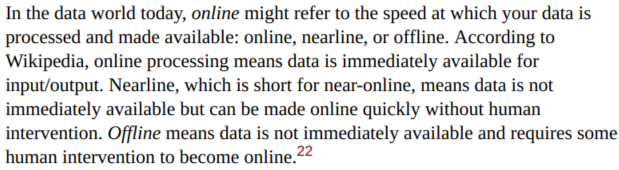

#### 4.2 ETL: Extract, Transform, and Load

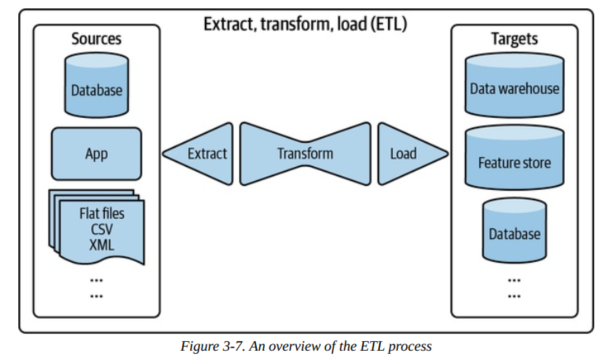

**Extract**:
- Extract the data you want from all your data sources.
- Some of the data will be corrupted or malformatted. 
- You need to **validate** your data and reject the data that doesn't meet your requirements.
- For rejected data, you might have to notify your sources.

**Transform**:
- Where most of the **data processing** is done. 
- You might want to join data from multiple sources and clean it. 
- You might want to standardize the value ranges (e.g., one data source might use “Male” and “Female” for genders, but another uses “M” and “F” or “1” and “2”). 
- You can apply operations such as transposing, deduplicating, sorting, aggregating, deriving new features, more data validating, etc.

**Load**:
- Deciding **how and how often to load your transformed data into the target destination**, which can be a file, a database, or a data warehouse.

Finding it difficult to keep data structured, some companies had this idea: **“Why not just store all data in a data lake so we don’t have to deal with schema changes? Whichever application needs data can just pull out raw data from there and process it.”** This process of loading data into storage first then processing it later is sometimes called **ELT (extract, load, transform)**. This paradigm allows for the fast arrival of data since there’s little processing needed before data is stored.

However, as data keeps on growing, this idea becomes less attractive. It’s **inefficient to search through a massive amount of raw data for the data that you want**. At the same time, **as companies switch to running applications on the cloud and infrastructures become standardized, data structures also become standardized**. Committing data to a predefined schema becomes more feasible.

As companies weigh the pros and cons of storing structured data versus storing unstructured data, vendors evolve to offer **hybrid solutions that combine the flexibility of data lakes and the data management aspect of data warehouses**. For example, Databricks and Snowflake both provide **data lakehouse** solutions.

### 5. Modes of Dataflow

Most of the time, in production, **you don’t have a single process but multiple**. A question arises: how do we pass data between different processes that don’t share memory?

When data is passed from one process to another, **we say that the data flows from one process to another, which gives us a dataflow**. 

Three main modes of dataflow: 
- Data passing through databases.
- Data passing through services using requests such as the requests provided by REST and RPC APIs (e.g., POST/GET requests).
- Data passing through a real-time transport like Apache Kafka and Amazon Kinesis.

#### 5.1 Data Passing Through Databases

The **easiest way to pass data between two processes is through databases**, which we’ve discussed in the section “Data Storage Engines and Processing”. 

For example, to pass data from process A to process B, process A can write that data into a database, and process B simply reads from that database.

Doesn't always work because of two reasons:
1. It requires that both processes must be able to access the same database.
    - e.g. infeasible if two processes are run by two different companies.
2. It requires both processes to access data from databases, and read/write from databases can be slow.
    - unsuitable for applications with strict latency requirements.
    - e.g. almost all consumer-facing applications.

#### 5.2 Data Passing Through Services

One way to pass data between two processes is to send data directly **through a network that connects these two processes**. 
- e.g. To pass data from process B to process A, process A first sends a request to process B that specifies the data A needs, and B returns the requested data through the same network. Because processes communicate through requests, we say that this is **request-driven**.

This mode of data passing is tightly coupled with the **service-oriented architectur**e. A **service is a process that can be accessed remotely**.
- e.g., through a network. In this example, B is exposed to A as a service that A can send requests to. For B to be able to request data from A, A will also need to be exposed to B as a service.

1. Two services in communication with each other can be run by **different companies** in different applications. 
    - A service might be run by a stock exchange that keeps track of the current stock prices. Another service might be run by an investment firm that requests the current stock prices and uses them to predict future stock prices.
2. Two services in communication with each other can also be parts of the **same application**. 
    - Structuring different components of your application as separate services allows each component to be developed, tested, and maintained independently of one another.
    - Structuring an application as separate services gives you a microservice architecture.

Microservice architecture in the context of ML systems:

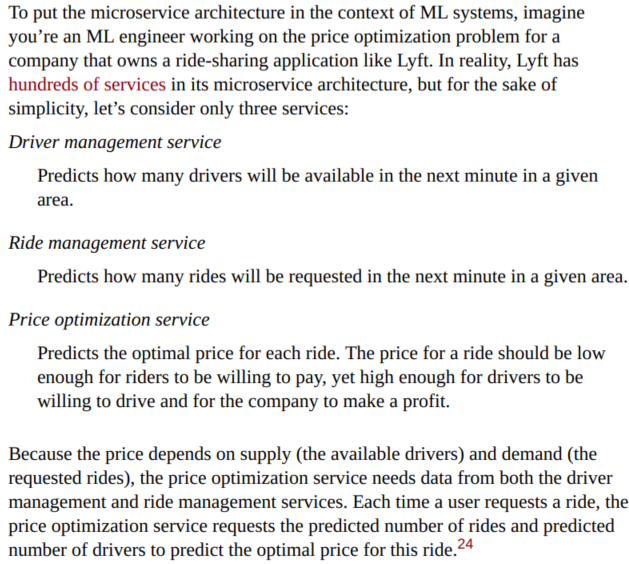

The most popular styles of requests used for passing data through networks are **REST (representational state transfer)** and **RPC (remote procedure call)**.

One major difference is that **REST was designed for requests over networks**, whereas RPC “tries to make a **request to a remote network service look the same as calling a function or method in your programming language**.” 

Because of this, “REST seems to be the **predominant style for public APIs**. The main focus of RPC frameworks is on **requests between services owned by the same organization**, typically within the same data center.

Implementations of a REST architecture are said to be **RESTful**. Even though many people think of REST as HTTP, REST doesn’t exactly mean HTTP because HTTP is just an implementation of REST.

#### 5.3 Data Passing Through Real-Time Transport

This mode of data passing is somewhere between passing through databases and passing through services: it allows for **asynchronous data passing with reasonably low latency**.

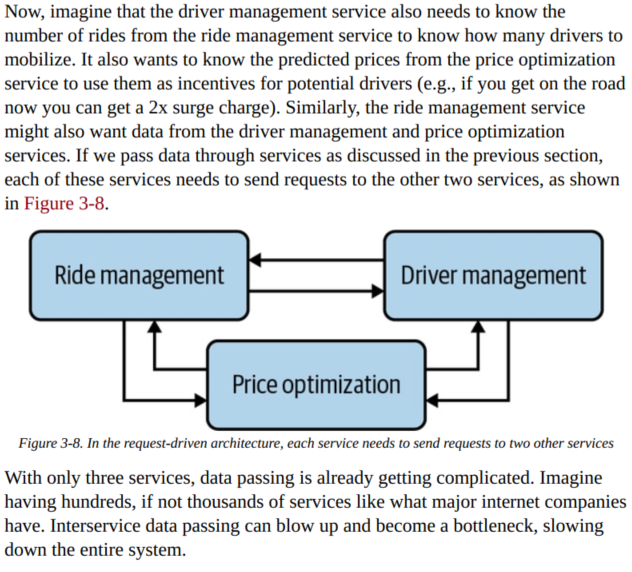

- Interservice data passing can blow up and become a **bottleneck**, slowing down the entire system.
- Request-driven data passing is **synchronous**: the target service has to listen to the request for the request to go through. 
- A service that is down can cause all services that require data from it to be down.

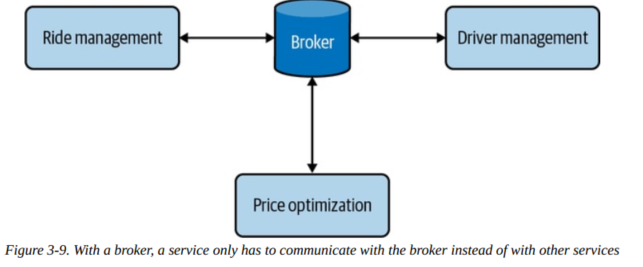

- A broker that coordinates data passing among services.
- Instead of having services request data directly from each other and creating a web of complex interservice data passing, **each service only has to communicate with the broker**.
- Real-time transports can be thought of as **in-memory** storage for data passing among services.
- A piece of data broadcast to a real-time transport is called an **event**. This architecture is, therefore, also called **event-driven**. 
- A real-time transport is sometimes called an **event bus**.
- **Request-driven** architecture works well for systems that rely more on **logic** than on data. **Event-driven** architecture works better for systems that are **data-heavy**.
- **Pubsub** (publish-subscribe) and **message queue** are the two most common types of real-time transports.

**Pubsub**:
- Any service can **publish to different topics** in a real-time transport.
- Any service that **subscribes to a topic** can read all the events in that topic.
- The services that produce data don’t care about what services consume their data. 
- Pubsub solutions often have a **retention policy**—data will be retained in the real-time transport for a certain period of time (e.g., seven days) before being deleted or moved to a permanent storage (like Amazon S3). 
- e.g. Apache Kafka, Amazon Kinesis.

**Message queue**:
-  An event often has **intended consumers** (an event with intended consumers is called a **message**).
- The **message queue** is responsiblefor getting the message to the right consumers.
- e.g. Apache RocketMQ, RabbitMQ.

### 6. Batch Processing Versus Stream Processing

**Batch Processing**:
- Once your data arrives in data storage like databases, data lakes, or data warehouses, it becomes **historical data**.
- Historical data is often processes in **batch jobs**, jobs that are kicked off **periodically**.
- Companies have come up with distributed systems like **MapReduce** and **Spark** to process batch data efficiently.

**Stream Processing**:
- When you have data in real-time transports like Apache Kafka and Amazon Kinesis, we say that you have **streaming data**.
- Refers to doing **computation on streaming data**.
- Computation on streaming data can also be kicked off **periodically**, but the periods are usually much shorter than the periods
for batch jobs.
    - e.g., every five minutes instead of every day. 
- Computation on streaming data can also be kicked off **whenever the need arises**. 
    - e.g., whenever a user requests a ride, you process your data stream to see what drivers are currently available.

**Stream processing**, when done right, can give **low latency** because you can process data as soon as data is generated, without having to first write it into databases. Many people believe that stream processing is less efficient than batch processing because you can’t leverage tools like MapReduce or Spark. This is not always the case, for two reasons:
1. Streaming technologies like **Apache Flink** are proven to be **highly scalable and fully distributed**, which means they can do **computation in parallel**.
2. The strength of stream processing is in **stateful computation**.
    - e.g. Consider the case where you want to process user engagement during a 30-day trial. If you kick off this batch job every day, you’ll have to do computation over the last 30 days every day. With stream processing, it’s possible to continue computing only the new data each day and joining the new data computation with the older data computation, preventing redundancy.

Batch processing happens much less frequently than stream processing, in ML:
1. **Batch Processing**:
- Usually used to compute **features that change less often**.
- e.g. drivers’ ratings (if a driver has had hundreds of rides, their rating is less likely to change significantly from one day to the next).
- **Batch features (a.k.a. static features)**: features extracted through batch processing.

2. **Stream Processing**:
- Compute features that change **quickly**.
- e.g. how many drivers are available right now, how many rides have been requested in the last minute, how many rides will be finished in the next two minutes, the median price of the last 10 rides in this area, etc. Features about the current state of the system like these are important to make the optimal price predictions. 
- **Streaming features (a.k.a. dynamic features)**: features extracted through stream processing.

For many problems, you need not only batch features or streaming featurs, but **both**. You need infrastructure that allows you to process streaming data as well as batch data and **join them together** to feed into your ML models.

To do computation on data streams, you need a **stream computation engine** (the way Spark and MapReduce are batch computation engines). For simple streaming computation, you might be able to get away with the built-in stream computation capacity of real-time transports like Apache Kafka, but Kafka stream processing is limited in its ability to deal with various data sources.

For ML systems that leverage streaming features, the streaming computation is rarely simple. The number of stream features used in an application such as fraud detection and credit scoring can be in the hundreds, if not thousands. The stream feature extraction logic can require complex queries with join and aggregation along different dimensions. To extract these features requires efficient stream processing engines. For this purpose, you might want to look into tools like **Apache Flink, KSQL, and Spark Streaming**. Of these three engines, Apache Flink and KSQL are more recognized in the industry and provide a nice SQL abstraction for data scientists.

Stream processing is more difficult because the **data amount is unbounded** and the **data comes in at variable rates and speeds**. **It’s easier to make a stream processor do batch processing than to make a batch processor do stream processing**. Apache Flink’s core maintainers have been arguing for years that batch processing is a special case of stream processing.
